# Importing XDF files in HyPyP
@Author : [@jonasmago](https://github.com/jonasmago) & [@FranckPrts](https://github.com/FranckPrts).

Last updated: September 2023

This tutorial guides you in using the `XDF_IMPORT` class provided by [hypyp.io.py](https://github.com/ppsp-team/HyPyP/blob/master/hypyp/io.py).

[XDF files](https://github.com/sccn/xdf) are generally produced by [LSL](https://labstreaminglayer.readthedocs.io/index.html) when recording multi-stream time-series data generated in different modalities (e.g., EEG, video, audio). This open-source format enables associating extensive meta information. It is tailored for biosignal data (e.g., EEG, EOG, ECG, MEG) but still supports high sampling rate data (e.g., audio) or high-channel data (e.g., video, fMRI).

In this tutorial, we convert 2 EEG streams from a sample XDF (containing containing another 8 video streams) into 2 `mne.Raw`.


## Imports & path to XDF file

In [1]:
from hypyp.io import XDF_IMPORT

path_xdf = "../data/sample_all.xdf" #insert path to XDF file here

## The `XDF_IMPORT` class

The class has the following arguments:


> > > TO UPDATE



- `path` : (str) Path to LSL data (i.e., XDF file). Can be absolute or relative. 
- `type` : (str) Define which type of stream the user is looking for. When converting EEG streams, or using  `convert_all_eeg=True`, the type must be set to "EEG". By default, `"EEG"`.
- `stream_idx` : (list) List of the stream index(es) in the XDF the user whish to import (must be of type "EEG"). By default, `None`. When set to `None`, `stream_idx` is appended the index of all streams of type `"EEG"`.
- `sfreq` : (float) Sampling frequency, can either be set automatically by the class or given by the user.
- `print_stream_name` : (boolean) Wheather the class should print the stream and their respective index in the XDF. By default, `True`.
- `convert_all_eeg` : (boolean) Defines if the class must automatically look for stream(s) of `type="EEG"` and convert them. By default, `True`.
- `save_FIF_path` (string) By default `None`. If set to a path, the class will save the targeted EEG stream as .fif file at that location (e.g., `"./figures/"` or `"~/Documents/current_project/"`). It will also create the folder structure if needed.
- `eeg_montage` (string) montage to apply to the eeg object that are converted. (all montages availables with mne can be found by running `mne.channels.get_builtin_montages()`)



First, we instanciat the class naively with the following argument to take a look at our XDF content: 
```
print_stream_name   = True
convert_all_eeg     = False
```

*We leave `sfreq` and `type` to their respective defaults so the class respectively determines the sampling rate and search for the EEG streams and their respective informations.*

In [2]:
eeg = XDF_IMPORT(path_xdf, print_stream_name=True, convert_all_eeg=False, save_FIF_path=None)

List of available stream(s):
	Stream BBT-E32-AAB033_FOT_3 is at idx:0
	Stream BBT-E32-AAB033_ExG_B_1 is at idx:1
	Stream BBT-E32-AAB033_DIN_4 is at idx:2
	Stream BBT-E32-AAB044_EEG_0 is at idx:3
	Stream BBT-E32-AAB044_ExG_B_1 is at idx:4
	Stream BBT-E32-AAB044_DIN_4 is at idx:5
	Stream BBT-E32-AAB033_IMU_B_2 is at idx:6
	Stream BBT-E32-AAB044_FOT_3 is at idx:7
	Stream BBT-E32-AAB033_EEG_0 is at idx:8
	Stream BBT-E32-AAB044_IMU_B_2 is at idx:9

Run XDF_IMPORT again with convert_all_eeg=True or specify the stream(s) you wish to convert using the list arg stream_idx.
To see the available streams in your XDF, re-run XDF_IMPORT with print_stream_name=True.


**Great!** Now we know what our XDF is conposed of. Let's explore different ways of converting on or multiple EEG stream from it into `mne.Raw` object(s).

### Two ways to use `IMPORT_XDF`


Here we look into two examples where we use `IMPORT_XDF` to convert the EEG streams into `mne.Raw`(s):
- **Situation 1:** The user wants to (blindly) **convert all** available EEG stream(s) in the XDF into `mne.Raw`(s)
- **Situation 2:** The user knows the index and/or name of one/multiple EEG stream(s) to convert

#### Situation 1
The user wants to (blindly) **convert all** available EEG stream(s) in the XDF into `mne.Raw`(s).

In [3]:
eeg = XDF_IMPORT(path_xdf, print_stream_name=False, convert_all_eeg=True, save_FIF_path=None)


Looking for EEG stream(s)
	Found EEG stream BBT-E32-AAB044_EEG_0 at index: 3
	Found EEG stream BBT-E32-AAB033_EEG_0 at index: 8

	--> Found 2 EEG stream(s) at index [3, 8]

Converting EEG stream(s) ... 

---> Converting BBT-E32-AAB044_EEG_0
- Sampling freq is 256.0 Hz
- Returning the data with no transformation, user input is 'None'
Creating RawArray with float64 data, n_channels=32, n_times=1424
    Range : 0 ... 1423 =      0.000 ...     5.559 secs
Ready.

---> Converting BBT-E32-AAB033_EEG_0
- Sampling freq is 256.0 Hz
- Returning the data with no transformation, user input is 'None'
Creating RawArray with float64 data, n_channels=32, n_times=1424
    Range : 0 ... 1423 =      0.000 ...     5.559 secs
Ready.

Convertion done.
- No channels information was found. The montage can be set manually/individually by using the MNE funciton set_montage on the mne.Raw objects.


In [4]:
eeg.raw_all

{'BBT-E32-AAB044_EEG_0': <RawArray | 32 x 1424 (5.6 s), ~391 kB, data loaded>,
 'BBT-E32-AAB033_EEG_0': <RawArray | 32 x 1424 (5.6 s), ~391 kB, data loaded>}

#### Situation 2
The user knows the indexes of the **multiple** EEG streams they want to convert. Here using both the chanel indexes and names.

In [20]:
# eeg = XDF_IMPORT(path_xdf, stream_idx= ["AAB044_EEG", 8], print_stream_name=False, convert_all_eeg=False, scale='auto', save_FIF_path=None)
eeg = XDF_IMPORT(path_xdf, stream_idx= ["AAB044_EEG", 8], print_stream_name=False, convert_all_eeg=False, scale=10e-6, save_FIF_path=None)


Converting EEG stream(s) ... 

---> Converting BBT-E32-AAB044_EEG_0
- Sampling freq is 256.0 Hz
- Returning the data scaled with 1e-05
Creating RawArray with float64 data, n_channels=32, n_times=1424
    Range : 0 ... 1423 =      0.000 ...     5.559 secs
Ready.

---> Converting BBT-E32-AAB033_EEG_0
- Sampling freq is 256.0 Hz
- Returning the data scaled with 1e-05
Creating RawArray with float64 data, n_channels=32, n_times=1424
    Range : 0 ... 1423 =      0.000 ...     5.559 secs
Ready.

Convertion done.
- No channels information was found. The montage can be set manually/individually by using the MNE funciton set_montage on the mne.Raw objects.


In [21]:
eeg.raw_all

{'BBT-E32-AAB044_EEG_0': <RawArray | 32 x 1424 (5.6 s), ~391 kB, data loaded>,
 'BBT-E32-AAB033_EEG_0': <RawArray | 32 x 1424 (5.6 s), ~391 kB, data loaded>}

# Extracting the XDF_IMPORT's output(s)

A practical way to save the converted stream to mne.Raw is to set a path for the class `XDF_IMPORT` to save the .fif file of each stream

You can now find the `Raw` that were converted in the dictionary `eeg.raw_all`:

In [22]:
eeg.raw_all

{'BBT-E32-AAB044_EEG_0': <RawArray | 32 x 1424 (5.6 s), ~391 kB, data loaded>,
 'BBT-E32-AAB033_EEG_0': <RawArray | 32 x 1424 (5.6 s), ~391 kB, data loaded>}

To extract one of the `mne.Raw` object form the `eeg` class, you can do the following:

In [23]:
standalone_raw = eeg.raw_all["BBT-E32-AAB044_EEG_0"]
standalone_raw

<RawArray | 32 x 1424 (5.6 s), ~391 kB, data loaded>

The name of the original XDF stream name is also stored in the `subject_info` dictionary nested in `Raw.Info`. So even if you separate a `Raw` from its key, you can still find the stream name's in its info.

In [24]:
# Print the name of the stream from the Raw.info object itself
print(f"standalone_raw subject info: {standalone_raw.info['subject_info']['his_idstr']}")

standalone_raw subject info: BBT-E32-AAB044_EEG_0


Once extracted, you can perform any analysis to the `standalone_raw` as you would with a `mne.Raw`!

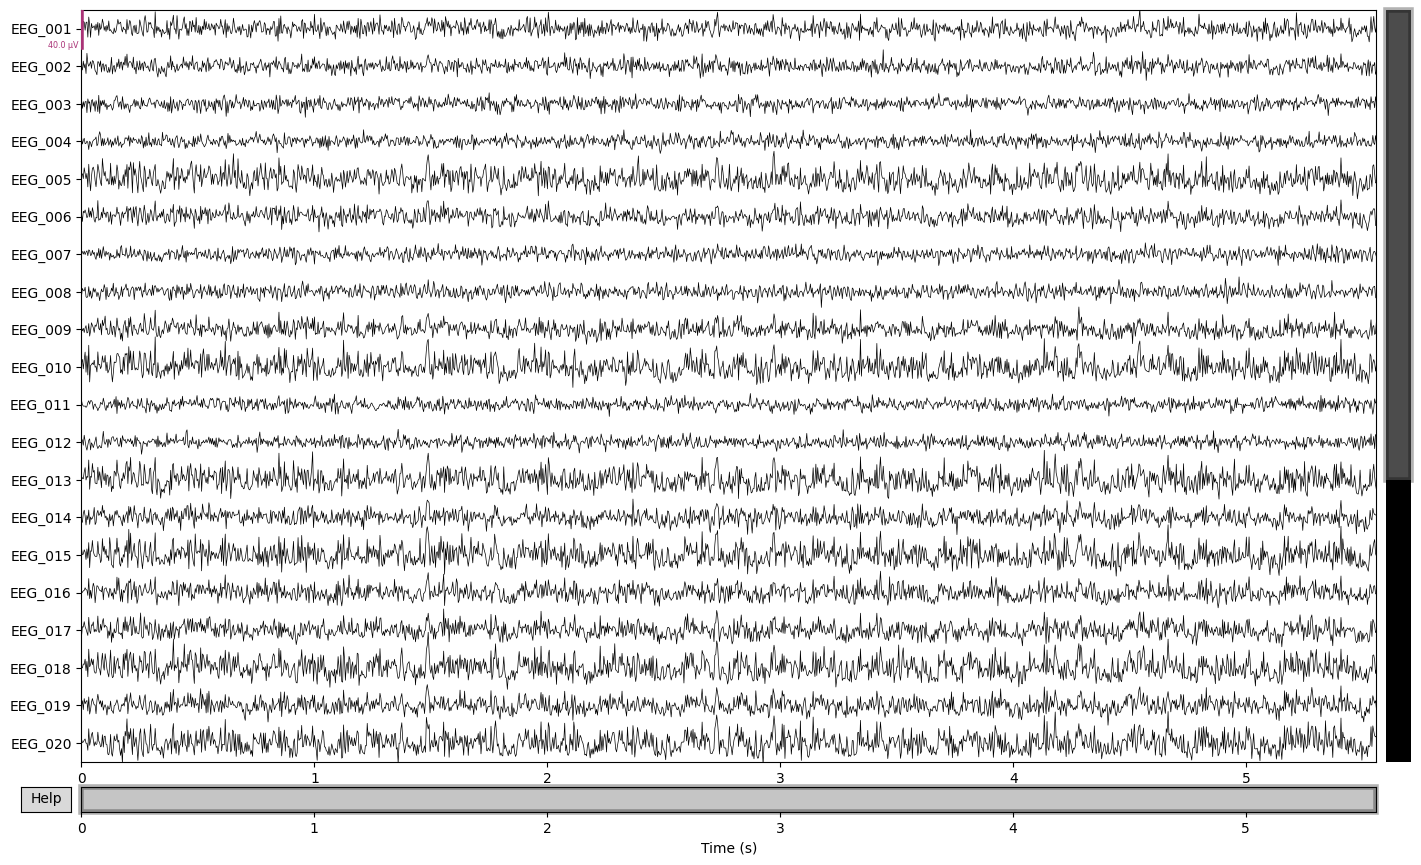

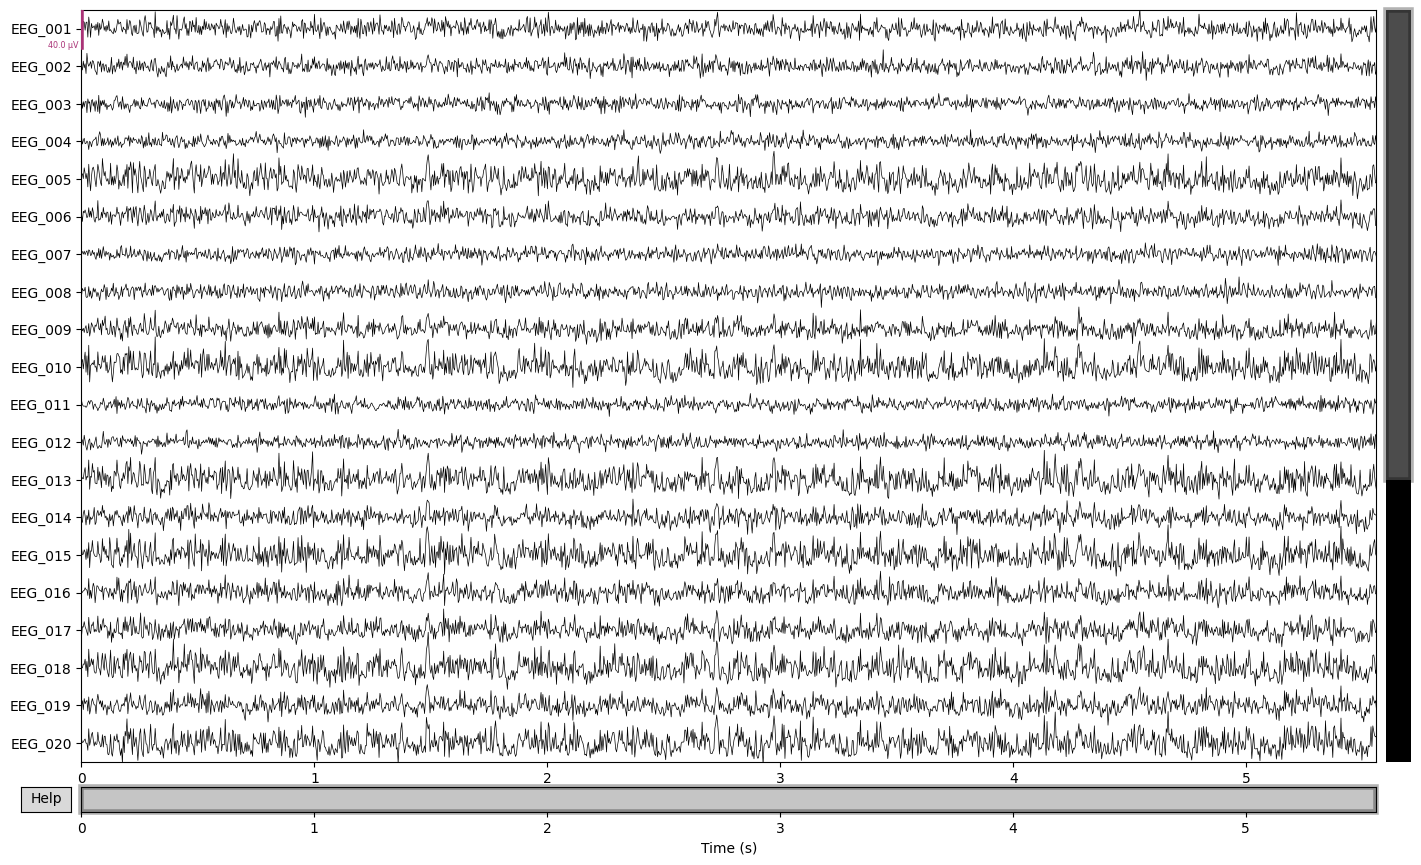

In [25]:
standalone_raw.plot()

## Montage

**Careful!** 

`XDF_IMPORT` does not set the montage automatically! Now that we have converted our stream(s) to `mne.Raw` object(s), we can fix that by setting the montage following [mne's general instruction for setting montage](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#about-montages-and-layouts). For example:

In [ ]:
# Set the montage to the standard 10-20 montage
eeg.raw_all['BBT-E32-AAB044_EEG_0'].set_montage('standard_1020')

# Plot the sensors
eeg.raw_all['BBT-E32-AAB044_EEG_0'].plot_sensors(show_names=True)

# Bonus

Instead of using indexes to choose which stream must be converted, the user can also indicate the full/partial names of the stream.

```
# With one partial name
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS_082'], print_stream_name=False, convert_all_eeg=False)

# With two partial names
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS_082', '1S_'], print_stream_name=False, convert_all_eeg=False)

# Here, the class will raise an exeption because the input is not precise enough to know which stream to import
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS'], print_stream_name=False, convert_all_eeg=False)

```